In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

BASE_DIR = Path("..")
PROCESSED_DIR = BASE_DIR / "processed"

# Archivos finales esperados
icd_registro_path = PROCESSED_DIR / "suelos_icd_registro.csv"
icd_depto_var_path = PROCESSED_DIR / "suelos_icd_depto_variable.csv"
forecast_global_path = PROCESSED_DIR / "forecast_global_por_variable.csv"

print("Cargando datos...")

df = pd.read_csv(icd_registro_path)
df_depto = pd.read_csv(icd_depto_var_path)

if forecast_global_path.exists():
    df_forecast = pd.read_csv(forecast_global_path)
else:
    df_forecast = None

print("Dimensiones:")
print("  suelos_icd_registro:", df.shape)
print("  suelos_icd_depto_variable:", df_depto.shape)
print("  forecast_global_por_variable:", None if df_forecast is None else df_forecast.shape)

df.head()

Cargando datos...
Dimensiones:
  suelos_icd_registro: (35111, 105)
  suelos_icd_depto_variable: (640, 3)
  forecast_global_por_variable: (3176, 4)


,secuencial,fecha_de_an_lisis,departamento,municipio,cultivo,estado,tiempo_de_establecimiento,topografia,drenaje,riego,...,icd_comp_zinc_olsen,icd_total_zinc_olsen,icd_comp_boro_disponible,icd_total_boro_disponible,icd_comp_hierro_doble_acido,icd_total_hierro_doble_acido,icd_comp_manganeso_doble_acido,icd_total_manganeso_doble_acido,icd_comp_zinc_doble_acido,icd_total_zinc_doble_acido
0,1,2014-07-01,NARIÑO,SAN ANDRÉS DE TUMACO,No Indica,No indica,No indica,No indica,No indica,No indica,...,1.0,0.990773,1.0,0.991738,0.0,0.489899,0.0,0.489899,0.0,0.489899
1,164,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Plano,Buen drenaje,Aspersión,...,1.0,0.991251,1.0,0.981230,0.0,0.489950,0.0,0.489950,0.0,0.489950
2,165,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Ondulado,Buen drenaje,Aspersión,...,1.0,0.967378,1.0,0.940961,0.0,0.454320,0.0,0.454320,0.0,0.454320
3,166,2014-05-09,CUNDINAMARCA,FUNZA,Guisantes,Por establecer,No indica,Plano,Buen drenaje,Goteo,...,1.0,0.947616,1.0,0.976663,0.0,0.475861,0.0,0.475861,0.0,0.475861
4,167,2014-05-09,VALLE DEL CAUCA,LA UNIÓN,Guanábana,Establecido,Mas de 10 años,Plano,Buen drenaje,Manguera,...,1.0,0.947470,1.0,0.550316,0.0,0.417193,0.0,0.417193,0.0,0.417193


In [29]:
# Detectar columnas ICD totales y predictivas
icd_total_cols = [c for c in df.columns if c.startswith("icd_total_")]
icd_pred_cols = [c for c in df.columns if c.startswith("icd_predictivo_")]

# Columna de territorio principal
group_col = "dep_norm" if "dep_norm" in df.columns else "departamento"

print("Columnas ICD Totales:", len(icd_total_cols))
print(icd_total_cols[:10])
print("\nColumnas ICD Predictivas:", len(icd_pred_cols))
print(icd_pred_cols[:10])
print("\nAgrupación territorial usada:", group_col)

Columnas ICD Totales: 20
['icd_total_ph_agua_suelo', 'icd_total_materia_organica', 'icd_total_fosforo_bray_ii', 'icd_total_azufre_fosfato_monocalcico', 'icd_total_acidez_intercambiable', 'icd_total_aluminio_intercambiable', 'icd_total_calcio_intercambiable', 'icd_total_magnesio_intercambiable', 'icd_total_potasio_intercambiable', 'icd_total_sodio_intercambiable']

Columnas ICD Predictivas: 20
['icd_predictivo_ph_agua_suelo', 'icd_predictivo_materia_organica', 'icd_predictivo_fosforo_bray_ii', 'icd_predictivo_azufre_fosfato_monocalcico', 'icd_predictivo_acidez_intercambiable', 'icd_predictivo_aluminio_intercambiable', 'icd_predictivo_calcio_intercambiable', 'icd_predictivo_magnesio_intercambiable', 'icd_predictivo_potasio_intercambiable', 'icd_predictivo_sodio_intercambiable']

Agrupación territorial usada: departamento


In [30]:
# Resumen por variable a partir de las columnas icd_total_
# (promedio nacional por variable)

resumen_variables = (
    df[icd_total_cols]
    .mean()
    .reset_index()
    .rename(columns={"index": "variable", 0: "icd_promedio"})
)

resumen_variables["variable"] = resumen_variables["variable"].str.replace("icd_total_", "", regex=False)
resumen_variables = resumen_variables.sort_values("icd_promedio", ascending=False)

resumen_variables

,variable,icd_promedio
10,cic,0.975494
0,ph_agua_suelo,0.964447
11,conductividad_electrica,0.963103
3,azufre_fosfato_monocalcico,0.960434
16,boro_disponible,0.950917
1,materia_organica,0.950527
7,magnesio_intercambiable,0.946367
6,calcio_intercambiable,0.943738
12,hierro_olsen,0.920600
14,manganeso_olsen,0.887859


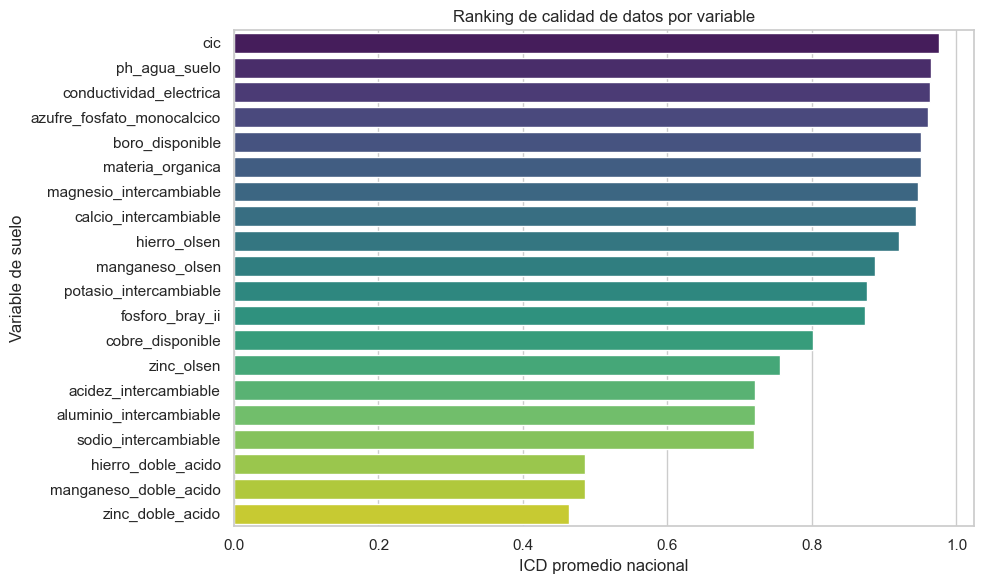

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=resumen_variables,
    x="icd_promedio",
    y="variable",
    palette="viridis"
)
plt.xlabel("ICD promedio nacional")
plt.ylabel("Variable de suelo")
plt.title("Ranking de calidad de datos por variable")
plt.tight_layout()
plt.show()

In [32]:
# ICD promedio general por departamento (promedio de todas las variables)

ranking_deptos = (
    df_depto.groupby(group_col)["icd_total_promedio"]
            .mean()
            .reset_index()
            .sort_values("icd_total_promedio", ascending=False)
)

ranking_deptos.head()

,departamento,icd_total_promedio
25,RISARALDA,0.846716
6,BOYACÁ,0.835248
29,VALLE DEL CAUCA,0.833317
10,CAUCA,0.828931
13,CUNDINAMARCA,0.827546


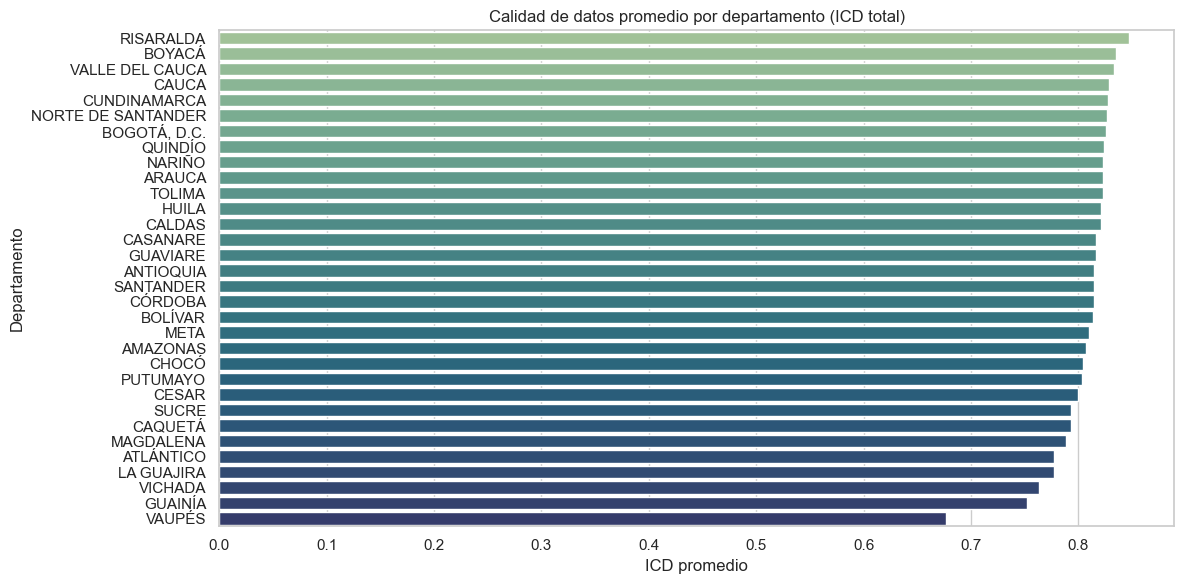

In [33]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=ranking_deptos,
    x="icd_total_promedio",
    y=group_col,
    palette="crest"
)
plt.title("Calidad de datos promedio por departamento (ICD total)")
plt.xlabel("ICD promedio")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()

In [34]:
if "anom_score_global" in df.columns:

    # ICD promedio por registro (promedio de todas las variables ICD_total)
    df["icd_promedio_registro"] = df[icd_total_cols].mean(axis=1, skipna=True)

    # Agregar por departamento
    df_anom_vs_icd = (
        df.groupby(group_col)
          .agg(
              anom=("anom_score_global", "mean"),
              icd=("icd_promedio_registro", "mean")
          )
          .reset_index()
    )

    df_anom_vs_icd.head()
else:
    df_anom_vs_icd = None
    print("⚠️ No se encontró 'anom_score_global' en df. Asegúrate de haber corrido libros 03 y 06.")

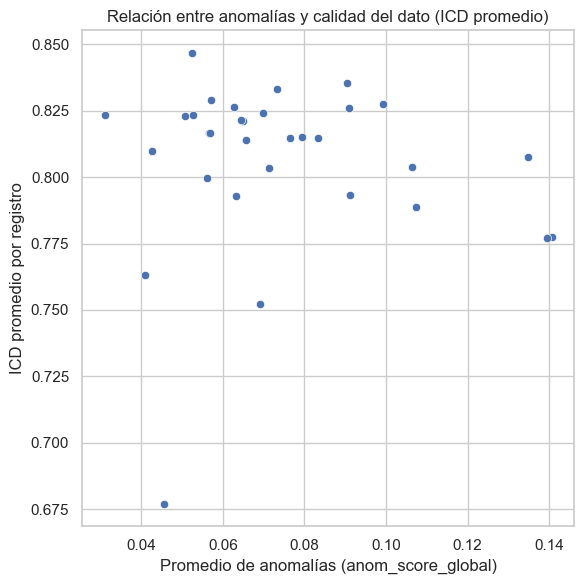

In [35]:
if df_anom_vs_icd is not None:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        data=df_anom_vs_icd,
        x="anom",
        y="icd"
    )
    plt.title("Relación entre anomalías y calidad del dato (ICD promedio)")
    plt.xlabel("Promedio de anomalías (anom_score_global)")
    plt.ylabel("ICD promedio por registro")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Variable de ejemplo para forecast: ph_agua_suelo


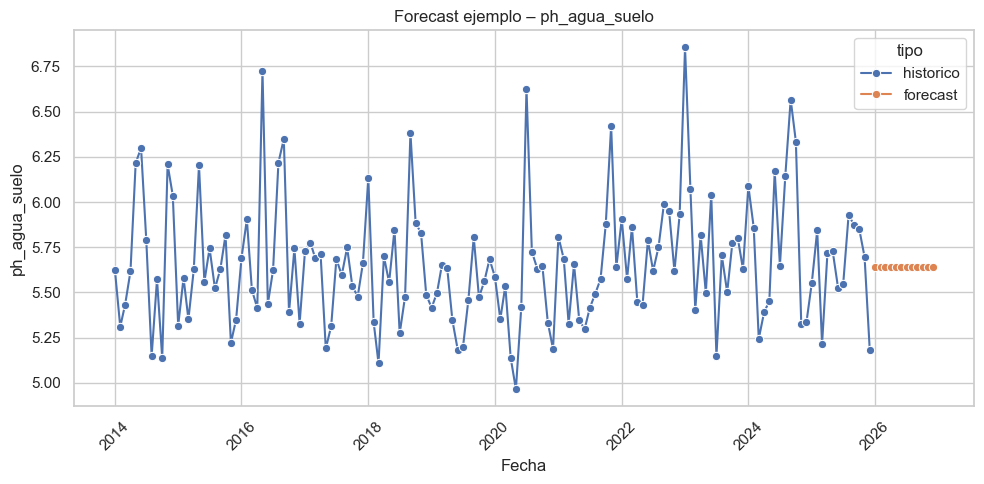

In [36]:
if df_forecast is not None:

    # Asegurar tipos
    df_forecast["fecha"] = pd.to_datetime(df_forecast["fecha"], errors="coerce")
    df_forecast = df_forecast.dropna(subset=["fecha"])

    # Elegir una variable de ejemplo
    ejemplo_var = df_forecast["variable"].unique()[0]
    print("Variable de ejemplo para forecast:", ejemplo_var)

    df_f = df_forecast[df_forecast["variable"] == ejemplo_var].copy()

    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=df_f,
        x="fecha",
        y="valor",
        hue="tipo",
        marker="o"
    )
    plt.title(f"Forecast ejemplo – {ejemplo_var}")
    plt.xlabel("Fecha")
    plt.ylabel(ejemplo_var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No se encontró archivo de forecast_global_por_variable.csv.")

In [37]:
export_folder = PROCESSED_DIR / "exportables"
export_folder.mkdir(exist_ok=True)

# 1. Resumen ICD por variable
resumen_variables.to_csv(export_folder / "resumen_icd_por_variable.csv", index=False, encoding="utf-8")

# 2. Resumen ICD por departamento
ranking_deptos.to_csv(export_folder / "resumen_icd_por_departamento.csv", index=False, encoding="utf-8")

# 3. (Opcional) Relación anomalía vs ICD
if df_anom_vs_icd is not None:
    df_anom_vs_icd.to_csv(export_folder / "relacion_anomalias_vs_icd.csv", index=False, encoding="utf-8")

print("✅ Exportaciones listas en:", export_folder.resolve())

✅ Exportaciones listas en: D:\ICD-SOIL\processed\exportables
